# Assignment 1 - US Census data

This assignment is due on **September 6, 2017** at **11:59 pm**.

## Updates

* Added probability questions
* Added links to Dplyr resources

In [1]:
install.packages("censusapi")

package 'censusapi' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Taso\AppData\Local\Temp\RtmpSuT18w\downloaded_packages


## Preliminaries

To work on this assignment, you will need three things:

1. Your basic [R installation with Jupyter and the Tidyverse](https://boisestate.github.io/CS533/resources.html).
2. The `censusapi` package, which can be installed with `conda install -c mdekstrand r-censusapi`.
3. A US Census API key, which you can obtain [here](https://api.census.gov/data/key_signup.html). Sometimes data sets will require you to register to get access to them, and this is a good exampe.

You can find documentation on the `censusapi` package in the [vignette](https://cran.r-project.org/web/packages/censusapi/vignettes/getting-started.html).

For reference, see [R for Data Science Chapter 5](r4ds.had.co.nz/transform.html) and the [dplyr introduction](dplyr.tidyverse.org/articles/dplyr.html).

In [2]:
library(tidyverse)
library(censusapi)
library(ggplot2)
library(maps)
#install.packages("maps",repos = "http://cran.us.r-project.org")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'censusapi'

The following object is masked from 'package:methods':

    getFunction


Attaching package: 'maps'

The following object is masked from 'package:purrr':

    map



In [3]:
# options(repos=c("https://cloud.r-project.org/"))
#install.packages("ggmap")


Set up your census key:

In [4]:
Sys.setenv(CENSUS_KEY="5b1c623bfbc1a58903da4032b852e66f1b8395e9")

## Loading Census Data

The census data is scattered among a bunch of sources.  Accessing it is somewhat arcane.

https://www.census.gov/data/developers/data-sets/decennial-census.html

- The `sf1` data set is the _summary file_, containing summary statistics about each region in the _decennial census_.
- The `vintage` says we want to use the 2010 census (the most recent one).
- `vars` selects some variables to download; `NAME` is the name of the region, `P0010001` is the total population, and `P0420002` is the total institutionalized (imprisoned) population.  For more fun, see the [full list of variables](http://api.census.gov/data/2010/sf1/variables.html).

In [5]:
census_2010 = getCensus(name="2010/dec/sf1",
          vars=c("NAME", "P010001", "P042002"),
          region="state:*")

census = select(census_2010, NAME, state, Total.Population=P010001, Total.Prison=P042002)
census

NAME,state,Total.Population,Total.Prison
Alabama,01,3647277,67004
Alaska,02,522853,6458
Arizona,04,4763003,84788
Arkansas,05,2204443,47287
California,06,27958916,397142
Louisiana,22,3415357,88104
Kentucky,21,3315996,70779
Colorado,08,3803587,61591
Connecticut,09,2757082,49370
Delaware,10,692169,11673


I recommend that you rename the fields to be something more meaningful before proceeding!

## Initial Questions

Write R code and text to answer the following questions:

### Most Populus States

What 5 states have the highest population?

**Hint:** the `arrange` dplyr verb will sort data.

In [6]:
census_pop = arrange(census, desc(Total.Population)) %>% top_n(5)
census_pop

Selecting by Total.Prison


NAME,state,Total.Population,Total.Prison
California,06,27958916,397142
Texas,48,18279737,375392
New York,36,15053173,231163
Florida,12,14799219,254506
Pennsylvania,42,9910224,197112


### Highest Prison Populations

What 5 states have the highest prison populations?

In [7]:
census_jail = arrange(census, desc(Total.Prison)) %>% top_n(5)
census_jail

Selecting by Total.Prison


NAME,state,Total.Population,Total.Prison
California,06,27958916,397142
Texas,48,18279737,375392
Florida,12,14799219,254506
New York,36,15053173,231163
Pennsylvania,42,9910224,197112


### Prisoners per Capita

What 5 states have the most prisoners per capita?

In [8]:
prisoner_per_capita = arrange(census %>% mutate(ppc = Total.Prison/Total.Population), desc(ppc)) %>% top_n(5)
prisoner_per_capita

Selecting by ppc


NAME,state,Total.Population,Total.Prison,ppc
Louisiana,22,3415357,88104,0.02579642
Mississippi,28,2211742,55135,0.02492831
South Dakota,46,611383,14797,0.02420250
Oklahoma,40,2821685,64411,0.02282714
Arkansas,05,2204443,47287,0.02145077


### Probability

What is the probability that a person selected at random is born in Rhode Island?

In [9]:
Tot.US.Pop = summarize(census, US=sum(Total.Population))
Rhode.Island = select(filter(census, state == 44), Rhode.Island=Total.Population)
Prob = select(Rhode.Island/Tot.US.Pop, Prob=Rhode.Island)
Prob

Prob
0.003490556


What is the probability that a person is born in one of the Dakotas (North Dakota or South Dakota)?

In [10]:
Dakotas = filter(census, state == 38 | state == 46)
Tot.Dakotas = summarize(Dakotas, NS_Dakota=sum(Total.Population))
Prob2 = select(Tot.Dakotas/Tot.US.Pop, Prob2=NS_Dakota)
Prob2

Prob2
0.004777452


## Visualization

Plot a histogram of state populations.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


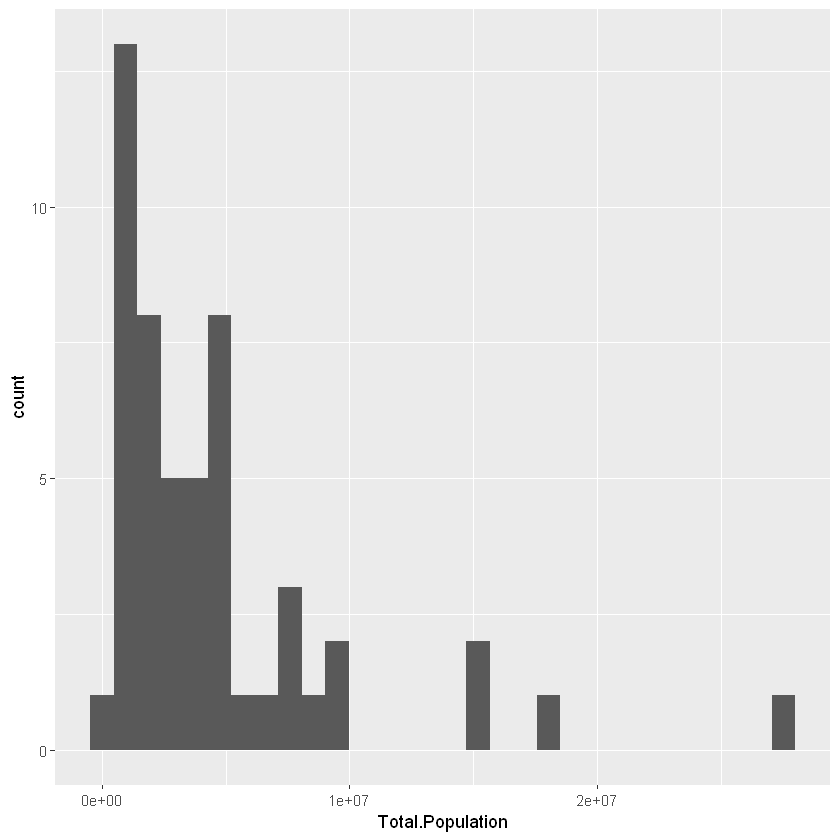

In [11]:
ggplot(census, aes(Total.Population)) +
  geom_histogram()

Plot a histogram of _county_ populations.  You can get counties by using `county:*` as your selector instead of `state:*` in a `getCensus` call.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


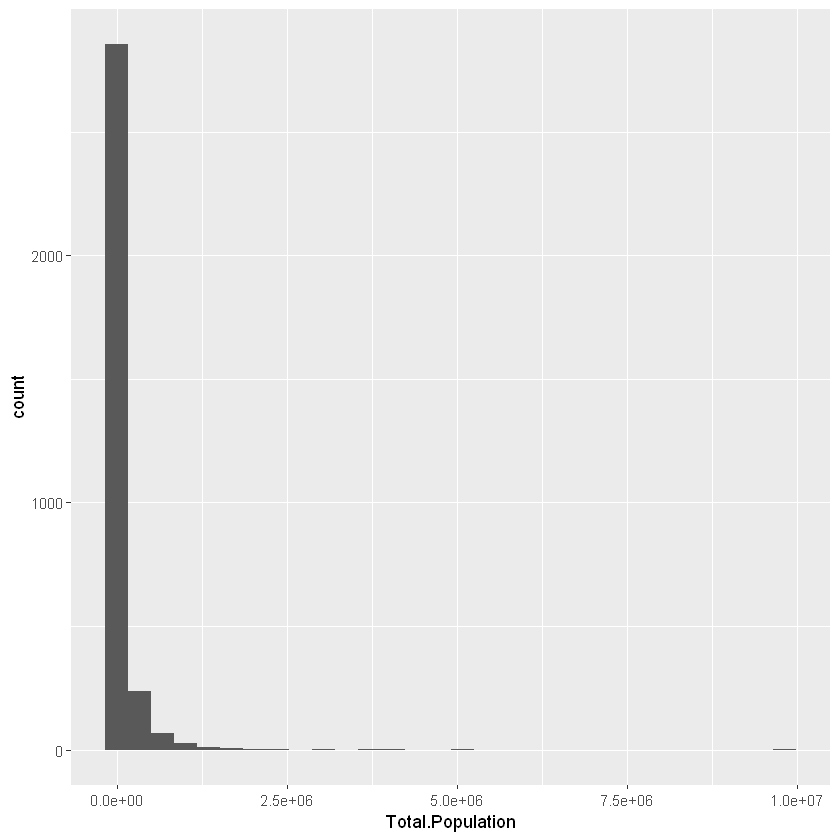

In [17]:
county_census = getCensus(name="2010/dec/sf1", vars=c("NAME", "P001001", "P042002"), region="county:*")
county = select(county_census, NAME, state, Total.Population=P001001, Total.Prison=P042002)
ggplot(county, aes(Total.Population)) +
  geom_histogram()

What are the largest 5 counties in Idaho?

In [18]:
idaho_census = (arrange(filter(county, state == 16), desc(Total.Population))) %>% top_n(5)
idaho_census

Selecting by Total.Prison


NAME,state,Total.Population,Total.Prison
"Ada County, Idaho",16,392365,7536
"Canyon County, Idaho",16,188923,1466
"Kootenai County, Idaho",16,138494,917
"Bannock County, Idaho",16,82839,884
"Twin Falls County, Idaho",16,77230,756


## Joining Data

For the next section, we want to work with _two_ data sets.

Fetch the 2000 data set as well. Unfortunately, they changed the variable names!  You can find the 2000 list [here](http://api.census.gov/data/2000/sf1/variables.html); the key thing is that, for example, the total population variable is now `P001001`

In [19]:
y2000_census = getCensus(name="sf1", vintage=2000, vars=c("NAME", "P001001"), region="state:*")
census_2000 = select(y2000_census, NAME, state, Total.Pop=P001001)
census_2000

NAME,state,Total.Pop
Alabama,01,4447100
Alaska,02,626932
Arizona,04,5130632
Arkansas,05,2673400
California,06,33871648
Colorado,08,4301261
Connecticut,09,3405565
Delaware,10,783600
District of Columbia,11,572059
Florida,12,15982378


You will need to connect the two data sets; the `inner_join` dplyr verb is used for this.

In [20]:
j_census = census_2000 %>% inner_join(census, by = c("NAME", "state"))
joined_census = select(j_census, NAME, state, Total.Pop.2010=Total.Population, Total.Pop.2000=Total.Pop)
joined_census

NAME,state,Total.Pop.2010,Total.Pop.2000
Alabama,01,3647277,4447100
Alaska,02,522853,626932
Arizona,04,4763003,5130632
Arkansas,05,2204443,2673400
California,06,27958916,33871648
Colorado,08,3803587,4301261
Connecticut,09,2757082,3405565
Delaware,10,692169,783600
District of Columbia,11,500908,572059
Florida,12,14799219,15982378


### Population Growth

What 5 states saw the most population growth from 2000 to 2010?

In [21]:
Pop_Growth = arrange(joined_census %>% mutate(Growth = Total.Pop.2010-Total.Pop.2000), desc(Growth)) %>% top_n(5)
Pop_Growth

Selecting by Growth


NAME,state,Total.Pop.2010,Total.Pop.2000,Growth
Nevada,32,2035543,1998257,37286
Wyoming,56,428224,493782,-65558
District of Columbia,11,500908,572059,-71151
Delaware,10,692169,783600,-91431
Alaska,02,522853,626932,-104079


### Population Loss

What 5 states saw the most population loss from 2000 to 2010?

In [22]:
Pop_Growth2 = arrange(joined_census %>% mutate(Growth = Total.Pop.2010-Total.Pop.2000), desc(Growth)) %>% top_n(-5)
Pop_Growth2

Selecting by Growth


NAME,state,Total.Pop.2010,Total.Pop.2000,Growth
Ohio,39,8805753,11353140,-2547387
Texas,48,18279737,20851820,-2572083
Illinois,17,9701453,12419293,-2717840
New York,36,15053173,18976457,-3923284
California,06,27958916,33871648,-5912732


### Fancy Graphics

See [Mapping US State, County, and Zipcode Data with R](http://www.poppy-zhang.com/r-coding/mapping-us-state-county-and-zipcode-data-with-r/) and plot a map of the 48 contiguous US states, shaded by their population growth from 2000 to 2010.

Warning message in self$trans$transform(x):
"NaNs produced"Warning message:
"Transformation introduced infinite values in discrete y-axis"

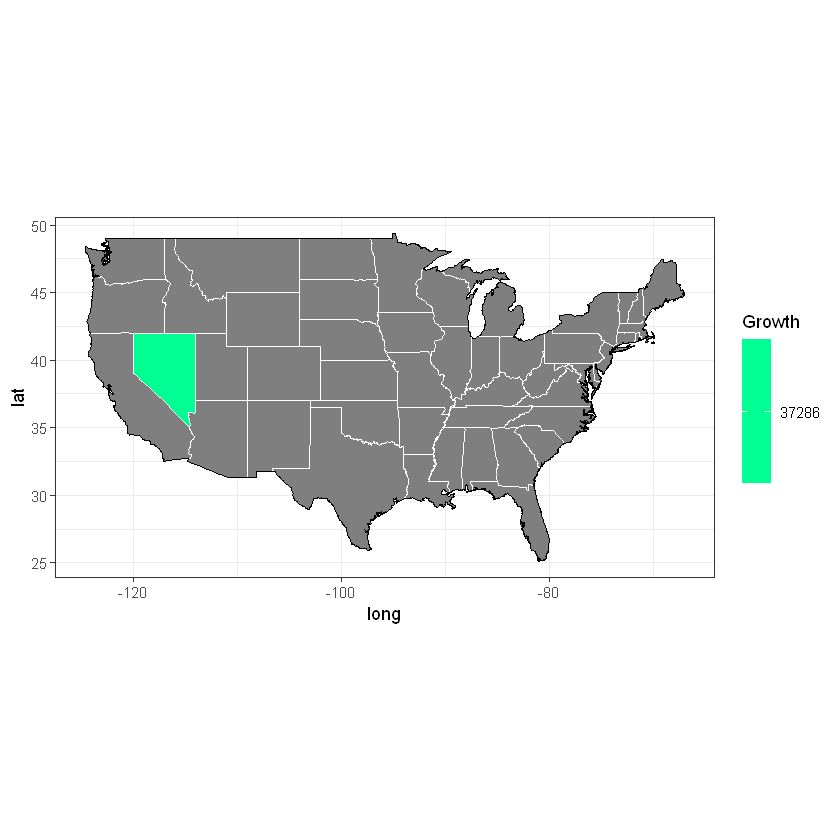

In [23]:
Pop_Growth3 = rename(joined_census %>% mutate(Growth = Total.Pop.2010-Total.Pop.2000), region=NAME)
Pop_Growth3 = Pop_Growth3 %>% mutate(region = tolower(region))
states <- map_data("state")
usa <- map_data("usa")
Growth.State = states %>% inner_join(Pop_Growth3, by = c("region"))

usa_base = ggplot(data = usa, mapping = aes(x = long, y = lat, group = group)) + 
  coord_fixed(1.3) + 
  geom_polygon(color = "black", fill = "gray")

usa_base = usa_base + 
  geom_polygon(data = states, fill = NA, color = "white") +
  geom_polygon(color = "black", fill = NA)  # get the state border back on top

usa_growth_map <- usa_base + 
      geom_polygon(data = Growth.State, aes(fill = Growth), color = "white") +
      geom_polygon(color = "black", fill = NA) +
      theme_bw() +
      scale_fill_gradientn(colours = rev(rainbow(7)),
                         breaks = c(2, 4, 10, 100, 1000, 10000),
                         trans = "log10")
usa_growth_map

## Go It Alone

Identify 5 more questions and answer them using the US Census data.

- At least one must use one or more variables not described above.
- At least 2 must involve joining more than one table
- You aren't restricted to state or even county level - individual census tracts can be interesting
- You do not need to keep looking nationwide - you can grab the census tracts in Idaho, for example

Question 1:  What is the occupancy breakout for Idaho by County in 2010?

In [26]:
occupancy = getCensus(name="2010/dec/sf1", vars=c("NAME", "H011001", "H011002", "H011003", "H011004"), 
                      region="county:*")
idaho_occupancy = select(filter(occupancy, state == 16), NAME, 
                          Total.Occupied.2010=H011001, Own.Mortgage.2010=H011002, Own.2010=H011003, Rent.2010=H011004)
idaho_occupancy

NAME,Total.Occupied.2010,Own.Mortgage.2010,Own.2010,Rent.2010
"Bear Lake County, Idaho",5955,3355,1554,1046
"Benewah County, Idaho",9215,4025,3024,2166
"Ada County, Idaho",382651,228874,41906,111871
"Adams County, Idaho",3955,1959,1176,820
"Bannock County, Idaho",81047,44689,12684,23674
"Bingham County, Idaho",45284,25456,9996,9832
"Blaine County, Idaho",21118,10945,3103,7070
"Boise County, Idaho",6994,4155,1601,1238
"Clark County, Idaho",980,309,289,382
"Boundary County, Idaho",10899,5464,3001,2434


Question 2: What 5 counties have the highest percentage of homeowners who don't have a mortgage?

In [27]:
Owners = arrange(idaho_occupancy %>% 
                 mutate(Percent.Owners = (Own.2010/Total.Occupied.2010)*100), desc(Percent.Owners)) %>% top_n(5)
Owners

Selecting by Percent.Owners


NAME,Total.Occupied.2010,Own.Mortgage.2010,Own.2010,Rent.2010,Percent.Owners
"Idaho County, Idaho",15743,6837,5288,3618,33.58953
"Clearwater County, Idaho",8154,3530,2731,1893,33.49276
"Benewah County, Idaho",9215,4025,3024,2166,32.81606
"Lemhi County, Idaho",7856,3386,2442,2028,31.08452
"Custer County, Idaho",4347,1940,1329,1078,30.57281


Question 3: What 5 counties had the largest increase in renters between 2000 and 2010 by county in Idaho?

In [29]:
occupancy_2000 = getCensus(name="2010/dec/sf1", vars=c("NAME", "H004001", "H004002", "H004003"), 
                      region="county:*")
idaho_occupancy_2000 = select(filter(occupancy_2000, state == 16), NAME, 
                          Total.Occupied.2000=H004001, Own.2000=H004002, Rent.2000=H004003)
joined_occupancy = select(idaho_occupancy_2000 %>% inner_join(idaho_occupancy, by = c("NAME")), 
                          NAME, Rent.2000, Rent.2010)
renter_delta = arrange(joined_occupancy %>% mutate(Rent.Change = Rent.2010-Rent.2000), 
                       desc(Rent.Change))
renter_change = renter_delta %>% top_n(5)
renter_change

Selecting by Rent.Change


NAME,Rent.2000,Rent.2010,Rent.Change
"Ada County, Idaho",21172,111871,90699
"Canyon County, Idaho",10206,55487,45281
"Kootenai County, Idaho",10324,38668,28344
"Twin Falls County, Idaho",5903,25453,19550
"Bonneville County, Idaho",7171,26214,19043


Question 4: What 5 counties had the largest increase in renters by percent between 2000 and 2010 by county in Idaho?

In [30]:
rent_changes = arrange(renter_delta %>% mutate(Rent.Change.Percent = (Rent.Change/Rent.2000)*100), 
                       desc(Rent.Change.Percent)) %>% top_n(5)
rent_changes

Selecting by Rent.Change.Percent


NAME,Rent.2000,Rent.2010,Rent.Change,Rent.Change.Percent
"Madison County, Idaho",1583,18587,17004,1074.1630
"Elmore County, Idaho",1718,10158,8440,491.2689
"Canyon County, Idaho",10206,55487,45281,443.6704
"Ada County, Idaho",21172,111871,90699,428.3913
"Jerome County, Idaho",1510,7884,6374,422.1192


Question 5: What were the changes in the African American population in Idaho by County from 2000 to 2010?

In [34]:
african_2010 = getCensus(name="2010/dec/sf1", vars=c("NAME", "P003003"), region="county:*")
african_2000 = getCensus(name="2010/dec/sf1", vars=c("NAME", "P003004"), region="county:*")
idaho.2010 = select(filter(african_2010, state == 16), NAME, Africans.2010=P003003)
idaho.2000 = select(filter(african_2000, state == 16), NAME, Africans.2000=P003004)
african_join = idaho.2010 %>% inner_join(idaho.2000, by = c("NAME"))
african_change = african_join %>% mutate(Change = Africans.2010-Africans.2000)
african_percent = african_change %>% mutate(Percent = (Change/Africans.2000)*100)
african_percent

NAME,Africans.2010,Africans.2000,Change,Percent
"Bear Lake County, Idaho",6,29,-23,-79.31034
"Benewah County, Idaho",28,809,-781,-96.53894
"Ada County, Idaho",4441,2610,1831,70.15326
"Adams County, Idaho",5,39,-34,-87.17949
"Bannock County, Idaho",625,2619,-1994,-76.13593
"Bingham County, Idaho",105,2970,-2865,-96.46465
"Blaine County, Idaho",39,125,-86,-68.80000
"Boise County, Idaho",15,55,-40,-72.72727
"Clark County, Idaho",7,10,-3,-30.00000
"Boundary County, Idaho",29,189,-160,-84.65608


## Submitting

Export your notebook to HTML and e-mail it to the professor.